## categorical Naive bayes

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_data.csv')

In [3]:
df.columns

Index(['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'MANEUVER', 'SEX', 'AGE'],
      dtype='object')

In [22]:
df

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,MANEUVER,SEX,AGE
0,6,2,3,10,11,3,0,1,17,8,4,5,10,21,1,52
1,6,2,3,10,11,3,0,1,17,8,4,5,10,21,1,78
2,6,2,3,10,11,3,0,1,17,8,4,5,10,21,1,52
3,6,2,3,10,11,3,0,1,17,8,4,5,10,21,1,78
4,17,2,3,8,8,3,0,1,15,34,9,5,10,21,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759915,6,2,3,7,8,3,0,1,34,34,9,3,7,21,0,78
1759916,6,2,3,7,8,3,0,1,34,34,9,3,7,21,1,43
1759917,6,2,3,7,8,3,0,1,34,34,9,3,7,21,0,78
1759918,6,2,3,7,8,3,0,1,34,34,9,3,7,14,1,43


In [5]:
input_cols = ['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'MANEUVER', 'SEX', 'AGE']
output_col = ['FIRST_CRASH_TYPE']

# Label Encoding categorical features
label_encoders = {}
for col in input_cols + output_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

In [6]:
label_encoders

{'POSTED_SPEED_LIMIT': LabelEncoder(),
 'WEATHER_CONDITION': LabelEncoder(),
 'LIGHTING_CONDITION': LabelEncoder(),
 'TRAFFICWAY_TYPE': LabelEncoder(),
 'ALIGNMENT': LabelEncoder(),
 'ROADWAY_SURFACE_COND': LabelEncoder(),
 'ROAD_DEFECT': LabelEncoder(),
 'PRIM_CONTRIBUTORY_CAUSE': LabelEncoder(),
 'SEC_CONTRIBUTORY_CAUSE': LabelEncoder(),
 'CRASH_HOUR': LabelEncoder(),
 'CRASH_DAY_OF_WEEK': LabelEncoder(),
 'CRASH_MONTH': LabelEncoder(),
 'MANEUVER': LabelEncoder(),
 'SEX': LabelEncoder(),
 'AGE': LabelEncoder(),
 'FIRST_CRASH_TYPE': LabelEncoder()}

In [7]:
joblib.dump(label_encoders, 'NB_encoders.joblib')

['NB_encoders.joblib']

In [9]:
label_encoders = joblib.load('NB_encoders.joblib')

In [43]:
df_sample = df.sample(frac=0.5, random_state=42)

In [44]:
df_sample

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,MANEUVER,SEX,AGE
1688287,2,2,1,10,12,3,0,1,12,24,17,1,4,21,1,70
1116197,17,2,3,10,8,3,0,5,34,24,8,0,10,21,0,51
1326247,17,2,3,10,8,3,0,1,16,24,10,5,7,19,1,32
23412,13,2,3,15,11,3,0,1,16,12,10,0,1,21,1,78
569219,17,2,4,15,15,3,0,1,22,16,13,1,8,21,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755342,22,2,1,10,2,3,0,1,34,34,15,6,7,21,1,45
1651749,17,2,1,15,8,3,0,1,20,34,13,0,2,2,1,33
1581207,13,2,1,15,2,3,0,1,34,24,19,1,4,20,1,60
994258,22,7,1,15,3,3,6,1,34,24,15,2,11,21,1,29


In [45]:
X = df_sample[input_cols]
y = df_sample[output_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = CategoricalNB()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

In [49]:
joblib.dump(model, 'Categorail_NB.joblib')

['Categorail_NB.joblib']

In [50]:
nb_model = joblib.load('Categorail_NB.joblib')

In [51]:
y_pred = nb_model.predict(X_test)

In [52]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.6274830674121551


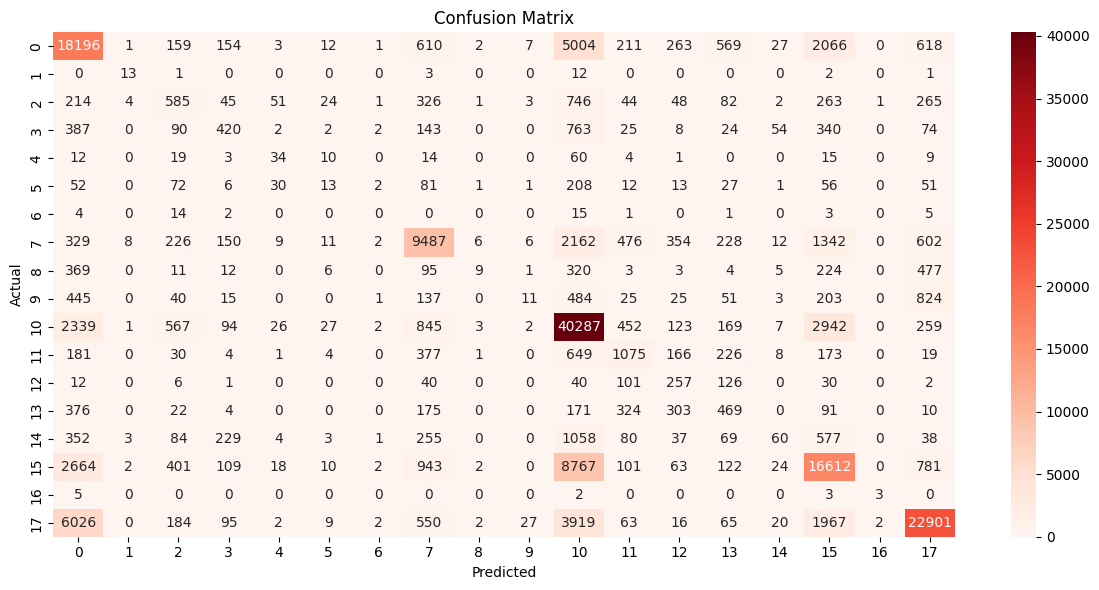

In [55]:
y_true = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()
cm = confusion_matrix(y_test, y_pred)
class_labels = [str(lbl) for lbl in np.unique(np.concatenate((y_true, y_pred)))]
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61     27903
           1       0.41      0.41      0.41        32
           2       0.23      0.22      0.22      2705
           3       0.31      0.18      0.23      2334
           4       0.19      0.19      0.19       181
           5       0.10      0.02      0.03       626
           6       0.00      0.00      0.00        45
           7       0.67      0.62      0.64     15410
           8       0.33      0.01      0.01      1539
           9       0.19      0.00      0.01      2264
          10       0.62      0.84      0.71     48145
          11       0.36      0.37      0.36      2914
          12       0.15      0.42      0.22       615
          13       0.21      0.24      0.22      1945
          14       0.27      0.02      0.04      2850
          15       0.62      0.54      0.58     30621
          16       0.50      0.23      0.32        13
          17       0.85    

custom input

In [61]:
new_sample = {
    'POSTED_SPEED_LIMIT': '40',
    'WEATHER_CONDITION': 'CLEAR',
    'LIGHTING_CONDITION': 'DAYLIGHT',
    'TRAFFICWAY_TYPE': 'FOUR WAY',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND': 'DRY',
    'ROAD_DEFECT': 'UNKNOWN',
    'PRIM_CONTRIBUTORY_CAUSE': 'FAILING TO REDUCE SPEED TO AVOID CRASH',
    'SEC_CONTRIBUTORY_CAUSE': 'DISTRACTION - FROM INSIDE VEHICLE',
    'CRASH_HOUR': '12',
    'CRASH_DAY_OF_WEEK':'6',
    'CRASH_MONTH':'8',
    'MANEUVER':'STRAIGHT AHEAD',
    'SEX':'M',
    'AGE': '35.0'
}

In [62]:
new_df = pd.DataFrame([new_sample])
for col in input_cols:
    val = str(new_df.at[0, col])
    new_df[col] = label_encoders[col].transform([val])
prediction = nb_model.predict(new_df)
print(f"Accident type: {label_encoders['FIRST_CRASH_TYPE'].inverse_transform(prediction)[0]}")

Accident type: REAR END
